In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [4]:
os.chdir("C:/Users/zhaoy/Documents/data")

In [ ]:
table_01=pd.read_excel("2021.01-2021.04(fabric width for HKU).xlsx")
table_04=pd.read_excel("2020.04-2020.07(fabric width for HKU).xlsx")
table_07=pd.read_excel("2021.07-2021.10(fabric width for HKU).xlsx")
table_10=pd.read_excel("2020.10-2021.01(fabric width for HKU).xlsx")
table_all=pd.concat([table_01,table_04,table_07,table_10], axis=0)
table_all.head()

In [7]:
table_all.info()
#类型为object的进行离散分析，类型为float的进行连续分析
#进行离散化分析，发现种类数量过多的，可以连续化后再分析

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308249 entries, 0 to 67380
Data columns (total 25 columns):
ETD-出货日期                 308249 non-null object
GF_NO-品名                 308249 non-null object
job_no-排单号               308249 non-null object
fabric_no-布号             308249 non-null object
fnsend_no-后整送布单          308249 non-null object
Quantity-卷长              308249 non-null float64
design_width-工艺门幅        308249 non-null float64
Actual_width-实际门幅        308249 non-null float64
Fabric_Type-布种代码         308249 non-null object
Warp_Density-经密          308249 non-null float64
Weft_Density-纬密          308249 non-null float64
F_Actual_count-纬向纱支      308249 non-null object
W_Actual_count-经向纱支      308249 non-null object
Component-成分             308249 non-null object
Reed_NO-筘号               308249 non-null float64
SUM_Reeding-入筘数          308249 non-null object
reed_width-筘幅            308249 non-null float64
ReedNo_type-筘号整理类别       308249 non-null object
Finish_list-整理方式   

In [10]:
table_all.describe()

,Quantity-卷长,design_width-工艺门幅,Actual_width-实际门幅,Warp_Density-经密,Weft_Density-纬密,Reed_NO-筘号,reed_width-筘幅,FabricNumber-织物组织类别,Is_Piece_Dye-是否CPB,Shrinkage-纬向缩水标准(分档前)
count,308249.000000,308249.000000,308249.000000,308249.000000,308249.000000,308249.000000,308249.000000,308249.000000,308249.000000,308249.000000
mean,114.443743,57.434924,56.827568,110.125749,69.427690,90.272598,68.921209,46.909761,0.003079,-3.149887
std,50.808119,3.216330,3.104079,33.743884,22.316303,28.022809,3.433248,364.581515,0.055400,1.596624
min,0.100000,42.500000,41.000000,36.000000,32.000000,29.000000,54.550000,0.000000,0.000000,-10.000000
25%,81.000000,58.500000,57.000000,76.000000,48.000000,58.000000,66.880000,1.000000,0.000000,-4.000000
50%,109.000000,58.500000,57.700000,110.000000,62.000000,92.000000,69.280000,2.000000,0.000000,-3.000000
75%,150.000000,58.500000,58.200000,130.000000,80.000000,108.000000,71.850000,8.000000,0.000000,-3.000000
max,347.000000,65.000000,65.000000,265.000000,180.000000,162.000000,74.200000,4929.000000,1.000000,0.000000


In [12]:
drop_cols1=['ETD-出货日期','GF_NO-品名','job_no-排单号','fabric_no-布号','fnsend_no-后整送布单']
table_useful=table_all.drop(drop_cols1,axis=1)
# table_useful.head()

,Quantity-卷长,design_width-工艺门幅,Actual_width-实际门幅,Fabric_Type-布种代码,Warp_Density-经密,Weft_Density-纬密,F_Actual_count-纬向纱支,W_Actual_count-经向纱支,Component-成分,Reed_NO-筘号,SUM_Reeding-入筘数,reed_width-筘幅,ReedNo_type-筘号整理类别,Finish_list-整理方式,Mercerizing-丝光,Wash_Method-水洗方式,FabricNumber-织物组织类别,Color_Type-是否本白,Is_Piece_Dye-是否CPB,Shrinkage-纬向缩水标准(分档前)
0,136.0,58.5,57.8,K,110.0,86.0,40,40,70.0% CTN / 30.0% PRE-RECYCLED CTN,92.0,2#,70.46,E,10+33+,18BE,EZW,7,N,0,-5.0
1,133.7,58.5,58.1,K,110.0,86.0,40,40,70.0% CTN / 30.0% PRE-RECYCLED CTN,92.0,2#,70.46,E,10+33+,18BE,EZW,7,N,0,-5.0
2,188.2,58.5,58.0,K,110.0,86.0,40,40,70.0% CTN / 30.0% PRE-RECYCLED CTN,92.0,2#,70.46,E,10+33+,18BE,EZW,7,N,0,-5.0
3,200.0,58.5,58.0,K,110.0,86.0,40,40,70.0% CTN / 30.0% PRE-RECYCLED CTN,92.0,2#,70.46,E,10+33+,18BE,EZW,7,N,0,-5.0
4,138.0,58.5,57.5,K,110.0,86.0,40,40,70.0% CTN / 30.0% PRE-RECYCLED CTN,92.0,2#,70.46,E,10+33+,18BE,EZW,7,N,0,-5.0


In [63]:
drop_cols2=['Quantity-卷长','Actual_width-实际门幅']
table_lisan=table_useful.drop(drop_cols2,axis=1)
table_lisan=table_lisan.drop_duplicates(keep='first')
# table_lisan.head()
table_lisan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 67065
Data columns (total 18 columns):
design_width-工艺门幅        1969 non-null float64
Fabric_Type-布种代码         1969 non-null object
Warp_Density-经密          1969 non-null float64
Weft_Density-纬密          1969 non-null float64
F_Actual_count-纬向纱支      1969 non-null object
W_Actual_count-经向纱支      1969 non-null object
Component-成分             1969 non-null object
Reed_NO-筘号               1969 non-null float64
SUM_Reeding-入筘数          1969 non-null object
reed_width-筘幅            1969 non-null float64
ReedNo_type-筘号整理类别       1969 non-null object
Finish_list-整理方式         1969 non-null object
Mercerizing-丝光           1969 non-null object
Wash_Method-水洗方式         1969 non-null object
FabricNumber-织物组织类别      1969 non-null int64
Color_Type-是否本白          1969 non-null object
Is_Piece_Dye-是否CPB       1969 non-null int64
Shrinkage-纬向缩水标准(分档前)    1969 non-null float64
dtypes: float64(6), int64(2), object(10)
memory usage: 292.3

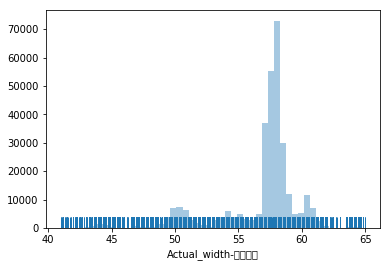

In [21]:
sns.distplot(table_useful['Actual_width-实际门幅'],bins=50,kde=False,rug=True)

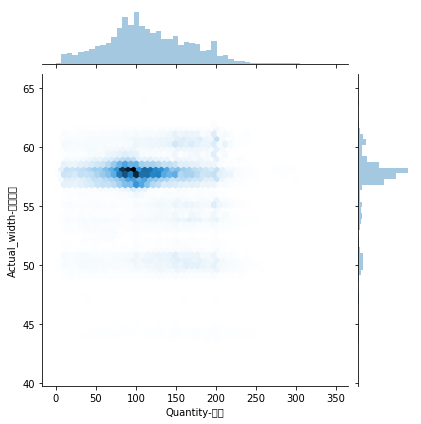

In [25]:
sns.jointplot(x='Quantity-卷长',y='Actual_width-实际门幅',data=table_useful,kind="hex")

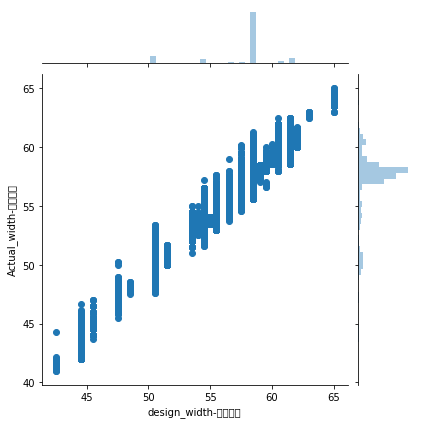

In [27]:
sns.jointplot(x='design_width-工艺门幅',y='Actual_width-实际门幅',data=table_useful)

In [29]:
print("pearson相关系数：",table_useful['Actual_width-实际门幅'].corr(table_useful['design_width-工艺门幅'],method="pearson"))
print("kendall相关系数：",table_useful['Actual_width-实际门幅'].corr(table_useful['design_width-工艺门幅'],method="kendall"))
print("spearman相关系数：",table_useful['Actual_width-实际门幅'].corr(table_useful['design_width-工艺门幅'],method="spearman"))

pearson相关系数： 0.9790746723548844
kendall相关系数： 0.7182236394254424
spearman相关系数： 0.8161817755534795


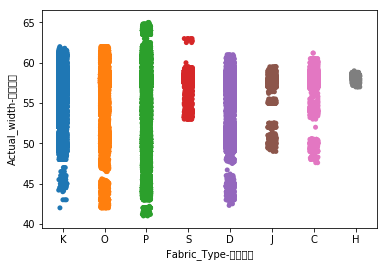

In [33]:
sns.stripplot(x='Fabric_Type-布种代码',y='Actual_width-实际门幅',data=table_useful)

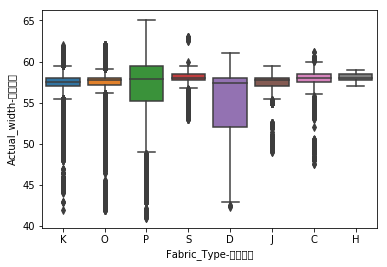

In [34]:
sns.boxplot(x='Fabric_Type-布种代码',y='Actual_width-实际门幅',data=table_useful)

pearson相关系数： -0.31967832852112504
kendall相关系数： -0.1350664035552979
spearman相关系数： -0.18670689987866385


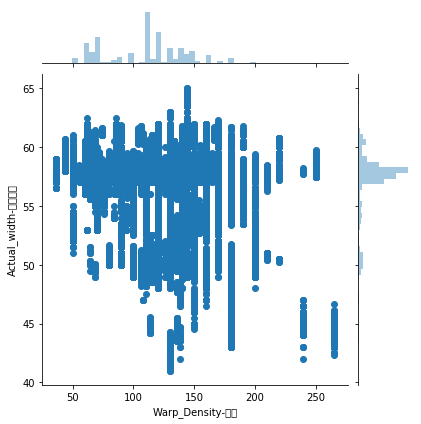

In [37]:
sns.jointplot(x='Warp_Density-经密',y='Actual_width-实际门幅',data=table_useful)
print("pearson相关系数：",table_useful['Actual_width-实际门幅'].corr(table_useful['Warp_Density-经密'],method="pearson"))
print("kendall相关系数：",table_useful['Actual_width-实际门幅'].corr(table_useful['Warp_Density-经密'],method="kendall"))
print("spearman相关系数：",table_useful['Actual_width-实际门幅'].corr(table_useful['Warp_Density-经密'],method="spearman"))


pearson相关系数： -0.13223005436354401
kendall相关系数： -0.13406305847656183
spearman相关系数： -0.18595239830284457


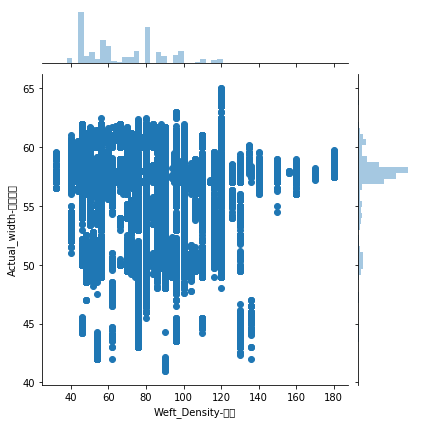

In [39]:
sns.jointplot(x='Weft_Density-纬密',y='Actual_width-实际门幅',data=table_useful)
print("pearson相关系数：",table_useful['Actual_width-实际门幅'].corr(table_useful['Weft_Density-纬密'],method="pearson"))
print("kendall相关系数：",table_useful['Actual_width-实际门幅'].corr(table_useful['Weft_Density-纬密'],method="kendall"))
print("spearman相关系数：",table_useful['Actual_width-实际门幅'].corr(table_useful['Weft_Density-纬密'],method="spearman"))

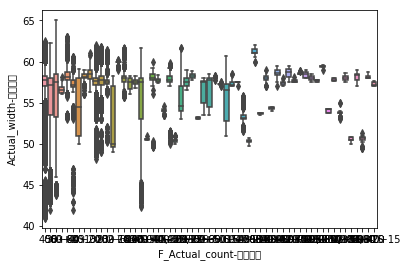

In [42]:
sns.boxplot(x='F_Actual_count-纬向纱支',y='Actual_width-实际门幅',data=table_useful)


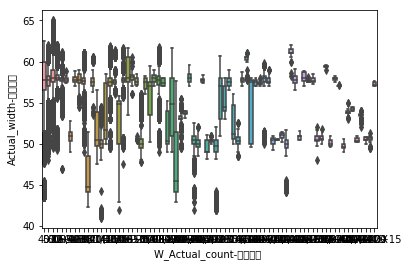

In [43]:
sns.boxplot(x='W_Actual_count-经向纱支 ',y='Actual_width-实际门幅',data=table_useful)


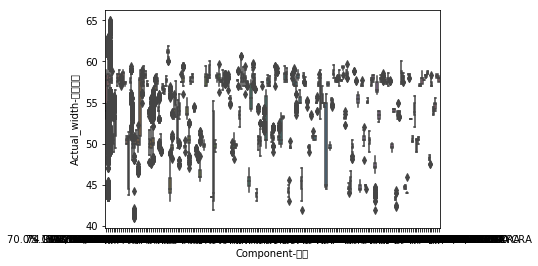

In [47]:
sns.boxplot(x='Component-成分',y='Actual_width-实际门幅',data=table_useful)

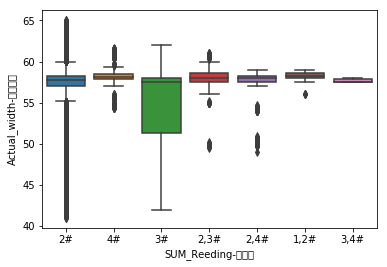

In [50]:
sns.boxplot(x='SUM_Reeding-入筘数',y='Actual_width-实际门幅',data=table_useful)


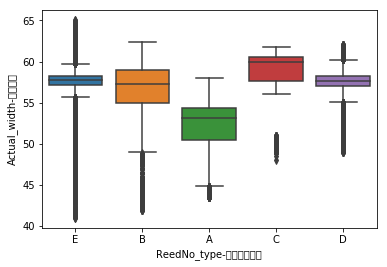

In [52]:
sns.boxplot(x='ReedNo_type-筘号整理类别',y='Actual_width-实际门幅',data=table_useful)


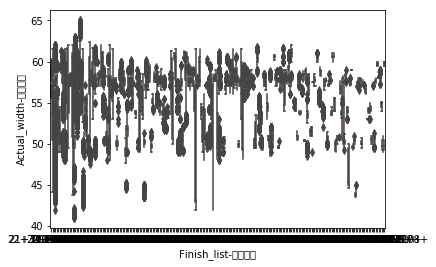

In [53]:
sns.boxplot(x='Finish_list-整理方式',y='Actual_width-实际门幅',data=table_useful)


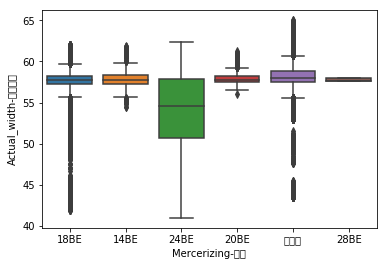

In [54]:
sns.boxplot(x='Mercerizing-丝光',y='Actual_width-实际门幅',data=table_useful)


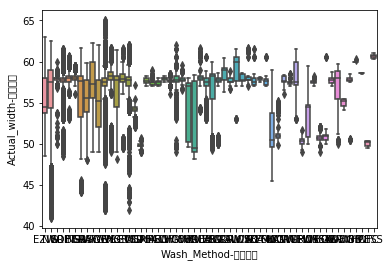

In [55]:
sns.boxplot(x='Wash_Method-水洗方式',y='Actual_width-实际门幅',data=table_useful)


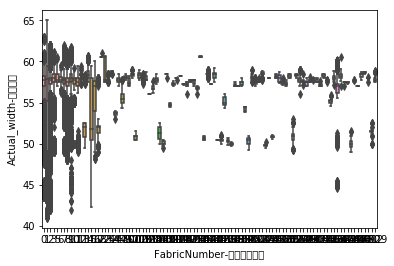

In [56]:
sns.boxplot(x='FabricNumber-织物组织类别',y='Actual_width-实际门幅',data=table_useful)


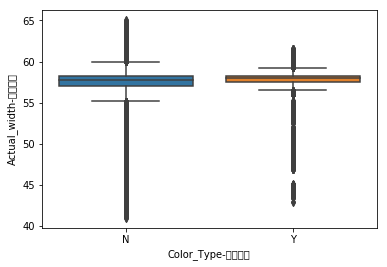

In [57]:
sns.boxplot(x='Color_Type-是否本白',y='Actual_width-实际门幅',data=table_useful)


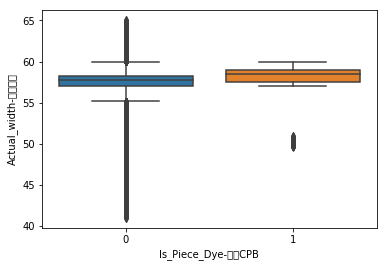

In [58]:
sns.boxplot(x='Is_Piece_Dye-是否CPB',y='Actual_width-实际门幅',data=table_useful)


pearson相关系数： -0.13036501825247096
kendall相关系数： -0.03312879381656461
spearman相关系数： -0.04086680567892401


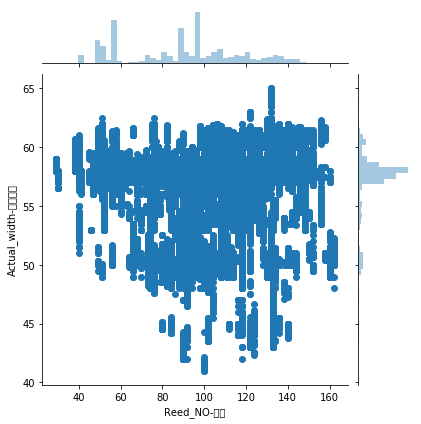

In [59]:
sns.jointplot(x='Reed_NO-筘号',y='Actual_width-实际门幅',data=table_useful)
print("pearson相关系数：",table_useful['Actual_width-实际门幅'].corr(table_useful['Reed_NO-筘号'],method="pearson"))
print("kendall相关系数：",table_useful['Actual_width-实际门幅'].corr(table_useful['Reed_NO-筘号'],method="kendall"))
print("spearman相关系数：",table_useful['Actual_width-实际门幅'].corr(table_useful['Reed_NO-筘号'],method="spearman"))


pearson相关系数： 0.287502125799388
kendall相关系数： 0.061392464375389554
spearman相关系数： 0.08876133881800154


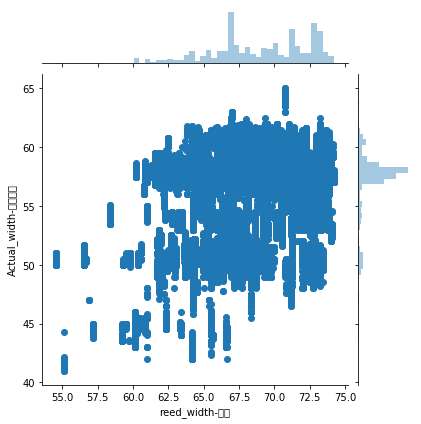

In [60]:
sns.jointplot(x='reed_width-筘幅',y='Actual_width-实际门幅',data=table_useful)
print("pearson相关系数：",table_useful['Actual_width-实际门幅'].corr(table_useful['reed_width-筘幅'],method="pearson"))
print("kendall相关系数：",table_useful['Actual_width-实际门幅'].corr(table_useful['reed_width-筘幅'],method="kendall"))
print("spearman相关系数：",table_useful['Actual_width-实际门幅'].corr(table_useful['reed_width-筘幅'],method="spearman"))

pearson相关系数： -0.04677478357753801
kendall相关系数： -0.08260344989626718
spearman相关系数： -0.10609453380606769


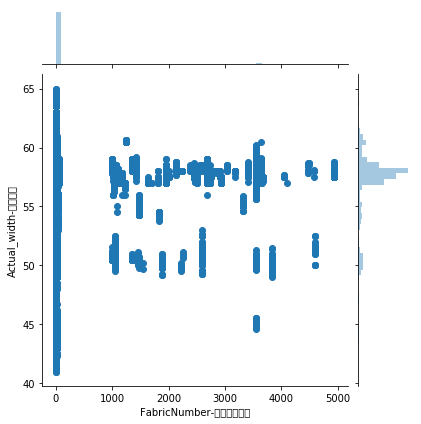

In [61]:
sns.jointplot(x='FabricNumber-织物组织类别',y='Actual_width-实际门幅',data=table_useful)
print("pearson相关系数：",table_useful['Actual_width-实际门幅'].corr(table_useful['FabricNumber-织物组织类别'],method="pearson"))
print("kendall相关系数：",table_useful['Actual_width-实际门幅'].corr(table_useful['FabricNumber-织物组织类别'],method="kendall"))
print("spearman相关系数：",table_useful['Actual_width-实际门幅'].corr(table_useful['FabricNumber-织物组织类别'],method="spearman"))


pearson相关系数： 0.05721680079931276
kendall相关系数： 0.0034988109382294626
spearman相关系数： 0.0022859590336128787


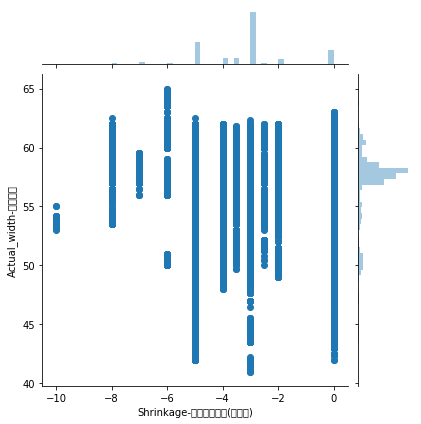

In [62]:
sns.jointplot(x='Shrinkage-纬向缩水标准(分档前)',y='Actual_width-实际门幅',data=table_useful)
print("pearson相关系数：",table_useful['Actual_width-实际门幅'].corr(table_useful['Shrinkage-纬向缩水标准(分档前)'],method="pearson"))
print("kendall相关系数：",table_useful['Actual_width-实际门幅'].corr(table_useful['Shrinkage-纬向缩水标准(分档前)'],method="kendall"))
print("spearman相关系数：",table_useful['Actual_width-实际门幅'].corr(table_useful['Shrinkage-纬向缩水标准(分档前)'],method="spearman"))


In [64]:
table_2=pd.read_excel("Shrinkage Data for HKU updated 5_4.xlsx")
table_2.head()


,gf_id 品种ID,gf_no 品种号,PPO_no PPO号,fabric_no 布号,send_no 送布单号,warp_shrinkage 经向缩率,weft_shrinkage 纬向缩率,wash_method 洗水方法,test_date 测试时间,Fabric_Type 织法,Warp_Type 经纱纱型,Weft_Type 纬纱纱型,Warp_Count 经纱支,Weft_Count 纬纱支,Warp_Density 经纱密度,Weft_Density 纬纱密度,Finishing_Method 整理方法,GEW STD warp GEW经向缩率审单标准,GEW STD weft GEW纬向缩率审单标准,Mercerizing 丝光碱浓
0,487543,PC5050-1P1856,PWGF18YF025040R,N21035610004,FG1803250129,-0.80,-0.6,GW,2018-04-02 09:24:47,P,CF+JC,CF+JC,50+100/2,50,120,100,1+,2.0,2.0,24BE
1,487575,PC5050-1P1866,PWGF18YF025040R,N21019210003,FG1803120005,0.03,-0.87,GW,2018-03-21 09:31:55,P,CF+JC,CF+JC,50+100/2,50,120,100,1+,2.0,2.0,24BE
2,483606,OC4020-1P0576,PWGF17YF024380B,MC2012010003,FG1801210063,0.50,-1.37,GW,2018-01-23 15:17:41,O,JC+CF,JC,40+80/2,20,110,54,1+,2.0,2.0,18BE
3,502868,CC5050-1P7899,PWGF17YF029756A,N10312120003,FG1801220103,0.70,-1.13,GW,2018-01-27 17:01:04,C,JC+CF,JC+CF,50+100/2,50,150,126,1+,2.0,2.0,24BE
4,502869,CC5050-1P7897,PWGF17YF029756A,N10313620001,FG1801310068,-1.00,-0.6,GW,2018-02-05 15:39:12,C,JC,JC,50,50,150,126,1+,2.0,2.0,24BE


In [65]:
table_2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113481 entries, 0 to 113480
Data columns (total 20 columns):
gf_id
品种ID                  113481 non-null int64
gf_no
品种号                   113481 non-null object
PPO_no
PPO号                 113481 non-null object
fabric_no
布号                113481 non-null object
send_no
送布单号                113481 non-null object
warp_shrinkage
经向缩率         113357 non-null float64
weft_shrinkage
纬向缩率         113357 non-null object
wash_method
洗水方法            113481 non-null object
test_date
测试时间              113481 non-null datetime64[ns]
Fabric_Type
织法              113481 non-null object
Warp_Type
经纱纱型              113481 non-null object
Weft_Type
纬纱纱型              113481 non-null object
Warp_Count
经纱支              113481 non-null object
Weft_Count
纬纱支              113481 non-null object
Warp_Density
经纱密度           113481 non-null int64
Weft_Density
纬纱密度           113481 non-null int64
Finishing_Method
整理方法       113481 non-null object
GEW STD warp
GEW

In [66]:
table_2.describe()

,gf_id 品种ID,warp_shrinkage 经向缩率,Warp_Density 经纱密度,Weft_Density 纬纱密度,GEW STD warp GEW经向缩率审单标准,GEW STD weft GEW纬向缩率审单标准
count,113481.000000,113357.000000,113481.000000,113481.000000,113481.000000,113481.000000
mean,550713.085671,-1.125320,106.353989,67.066002,3.948582,4.091073
std,50276.117364,1.282253,30.440094,20.039937,1.294785,1.316200
min,136086.000000,-9.330000,36.000000,32.000000,2.000000,2.000000
25%,538271.000000,-1.830000,76.000000,48.000000,3.000000,3.000000
50%,562675.000000,-1.100000,110.000000,60.000000,3.000000,4.000000
75%,583919.000000,-0.330000,120.000000,80.000000,5.000000,5.000000
max,608933.000000,4.330000,240.000000,200.000000,10.000000,10.000000


In [76]:
for a in table_2['weft_shrinkage\n纬向缩率']:
    if not isinstance(a,float):    
        if not isinstance(a,int):
            print(a)
    else:
        ;

-0.8.


In [94]:
table_3=pd.read_excel("Shrinkage Data for HKU updated 5_4.xlsx")
table_3.info()
#FG1909250049处的纬向缩率数据被污染(-0.8->-0.8.)，此处已手动修改
#触发点是纬向缩率         113357 non-null object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113481 entries, 0 to 113480
Data columns (total 20 columns):
gf_id
品种ID                  113481 non-null int64
gf_no
品种号                   113481 non-null object
PPO_no
PPO号                 113481 non-null object
fabric_no
布号                113481 non-null object
send_no
送布单号                113481 non-null object
warp_shrinkage
经向缩率         113357 non-null float64
weft_shrinkage
纬向缩率         113357 non-null float64
wash_method
洗水方法            113481 non-null object
test_date
测试时间              113481 non-null datetime64[ns]
Fabric_Type
织法              113481 non-null object
Warp_Type
经纱纱型              113481 non-null object
Weft_Type
纬纱纱型              113481 non-null object
Warp_Count
经纱支              113481 non-null object
Weft_Count
纬纱支              113481 non-null object
Warp_Density
经纱密度           113481 non-null int64
Weft_Density
纬纱密度           113481 non-null int64
Finishing_Method
整理方法       113481 non-null object
GEW STD warp
GE

In [88]:
# for a in range(len(table_3['weft_shrinkage\n纬向缩率'])):
#     if not isinstance(table_3['weft_shrinkage\n纬向缩率'][a],float):    
#         if not isinstance(table_3['weft_shrinkage\n纬向缩率'][a],int):
#             print(a)
# print(table_3['send_no\n送布单号'][22128])

22128


C:\Users\zhaoy\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\zhaoy\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


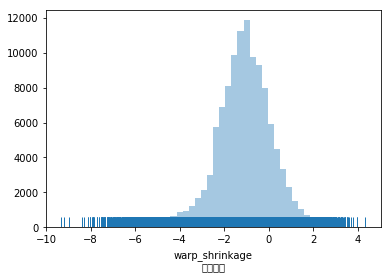

In [95]:
sns.distplot(table_3['warp_shrinkage\n经向缩率'],bins=50,kde=False,rug=True)

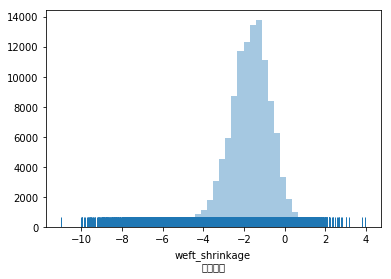

In [96]:
sns.distplot(table_3['weft_shrinkage\n纬向缩率'],bins=50,kde=False,rug=True)

pearson相关系数： 0.3616227764001237
kendall相关系数： 0.17759696883304182
spearman相关系数： 0.2591309993978863


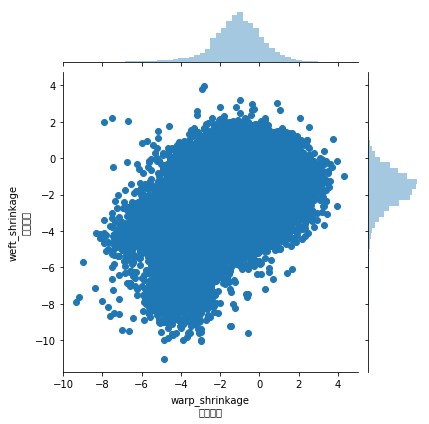

In [99]:
sns.jointplot(x='warp_shrinkage\n经向缩率',y='weft_shrinkage\n纬向缩率',data=table_3)
print("pearson相关系数：",table_3['weft_shrinkage\n纬向缩率'].corr(table_3['warp_shrinkage\n经向缩率'],method="pearson"))
print("kendall相关系数：",table_3['weft_shrinkage\n纬向缩率'].corr(table_3['warp_shrinkage\n经向缩率'],method="kendall"))
print("spearman相关系数：",table_3['weft_shrinkage\n纬向缩率'].corr(table_3['warp_shrinkage\n经向缩率'],method="spearman"))


纬向缩率pearson相关系数： -0.030709888208449145
纬向缩率kendall相关系数： -0.03310514188988799
纬向缩率spearman相关系数： -0.05012706164793453
经向缩率pearson相关系数： -0.09594290730462028
经向缩率kendall相关系数： -0.08810780911123295
经向缩率spearman相关系数： -0.12697600942146395


<Figure size 432x288 with 0 Axes>

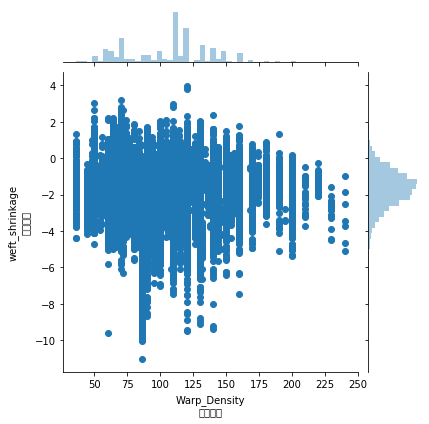

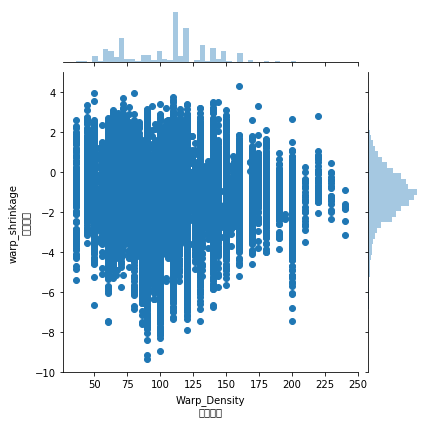

In [113]:
f=plt.figure()
f.add_subplot(2,1,1)
sns.jointplot(x='Warp_Density\n经纱密度',y='weft_shrinkage\n纬向缩率',data=table_3)
print("纬向缩率pearson相关系数：",table_3['weft_shrinkage\n纬向缩率'].corr(table_3['Warp_Density\n经纱密度'],method="pearson"))
print("纬向缩率kendall相关系数：",table_3['weft_shrinkage\n纬向缩率'].corr(table_3['Warp_Density\n经纱密度'],method="kendall"))
print("纬向缩率spearman相关系数：",table_3['weft_shrinkage\n纬向缩率'].corr(table_3['Warp_Density\n经纱密度'],method="spearman"))
f.add_subplot(2,1,2)
sns.jointplot(x='Warp_Density\n经纱密度',y='warp_shrinkage\n经向缩率',data=table_3)
print("经向缩率pearson相关系数：",table_3['warp_shrinkage\n经向缩率'].corr(table_3['Warp_Density\n经纱密度'],method="pearson"))
print("经向缩率kendall相关系数：",table_3['warp_shrinkage\n经向缩率'].corr(table_3['Warp_Density\n经纱密度'],method="kendall"))
print("经向缩率spearman相关系数：",table_3['warp_shrinkage\n经向缩率'].corr(table_3['Warp_Density\n经纱密度'],method="spearman"))
f.clear()

C:\Users\zhaoy\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


纬向缩率pearson相关系数： -0.11985893614296182
纬向缩率kendall相关系数： -0.04964466789341022
纬向缩率spearman相关系数： -0.07367861887679959
经向缩率pearson相关系数： -0.21541698463860623
经向缩率kendall相关系数： -0.13813553871620235
经向缩率spearman相关系数： -0.19890635527222683


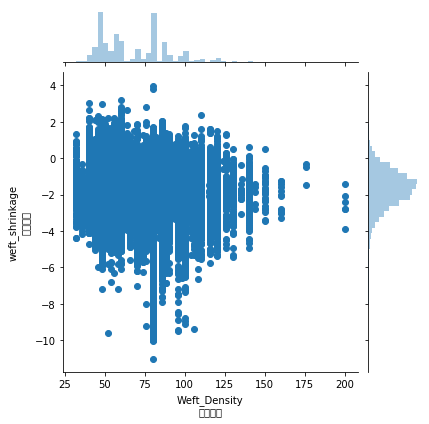

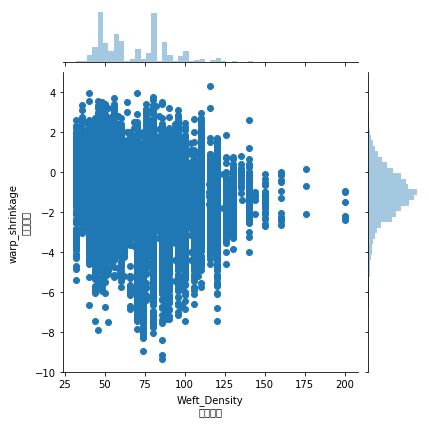

In [116]:
f.add_subplot(2,1,1)
sns.jointplot(x='Weft_Density\n纬纱密度',y='weft_shrinkage\n纬向缩率',data=table_3)
print("纬向缩率pearson相关系数：",table_3['weft_shrinkage\n纬向缩率'].corr(table_3['Weft_Density\n纬纱密度'],method="pearson"))
print("纬向缩率kendall相关系数：",table_3['weft_shrinkage\n纬向缩率'].corr(table_3['Weft_Density\n纬纱密度'],method="kendall"))
print("纬向缩率spearman相关系数：",table_3['weft_shrinkage\n纬向缩率'].corr(table_3['Weft_Density\n纬纱密度'],method="spearman"))
f.add_subplot(2,1,2)
sns.jointplot(x='Weft_Density\n纬纱密度',y='warp_shrinkage\n经向缩率',data=table_3)
print("经向缩率pearson相关系数：",table_3['warp_shrinkage\n经向缩率'].corr(table_3['Weft_Density\n纬纱密度'],method="pearson"))
print("经向缩率kendall相关系数：",table_3['warp_shrinkage\n经向缩率'].corr(table_3['Weft_Density\n纬纱密度'],method="kendall"))
print("经向缩率spearman相关系数：",table_3['warp_shrinkage\n经向缩率'].corr(table_3['Weft_Density\n纬纱密度'],method="spearman"))
f.clear()

纬向缩率pearson相关系数： -0.4499691978748482
纬向缩率kendall相关系数： -0.19537024284382928
纬向缩率spearman相关系数： -0.2524828718666706
经向缩率pearson相关系数： -0.41427114943366755
经向缩率kendall相关系数： -0.193391994771518
经向缩率spearman相关系数： -0.24860262771983813


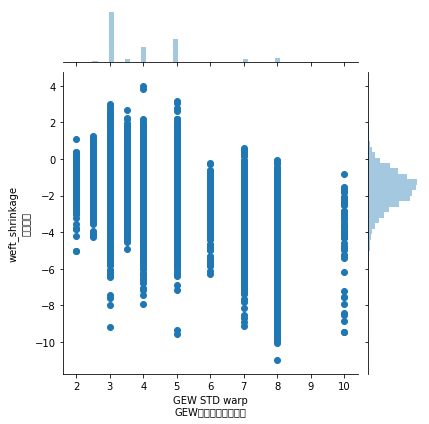

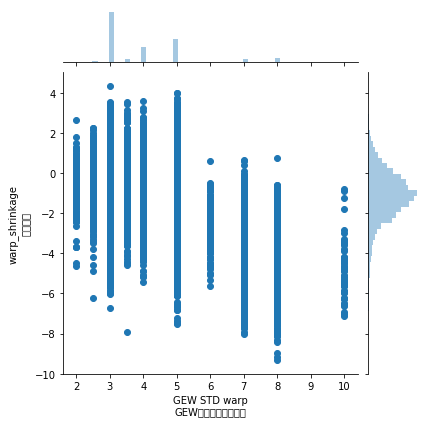

In [117]:
f.add_subplot(2,1,1)
sns.jointplot(x='GEW STD warp\nGEW经向缩率审单标准',y='weft_shrinkage\n纬向缩率',data=table_3)
print("纬向缩率pearson相关系数：",table_3['weft_shrinkage\n纬向缩率'].corr(table_3['GEW STD warp\nGEW经向缩率审单标准'],method="pearson"))
print("纬向缩率kendall相关系数：",table_3['weft_shrinkage\n纬向缩率'].corr(table_3['GEW STD warp\nGEW经向缩率审单标准'],method="kendall"))
print("纬向缩率spearman相关系数：",table_3['weft_shrinkage\n纬向缩率'].corr(table_3['GEW STD warp\nGEW经向缩率审单标准'],method="spearman"))
f.add_subplot(2,1,2)
sns.jointplot(x='GEW STD warp\nGEW经向缩率审单标准',y='warp_shrinkage\n经向缩率',data=table_3)
print("经向缩率pearson相关系数：",table_3['warp_shrinkage\n经向缩率'].corr(table_3['GEW STD warp\nGEW经向缩率审单标准'],method="pearson"))
print("经向缩率kendall相关系数：",table_3['warp_shrinkage\n经向缩率'].corr(table_3['GEW STD warp\nGEW经向缩率审单标准'],method="kendall"))
print("经向缩率spearman相关系数：",table_3['warp_shrinkage\n经向缩率'].corr(table_3['GEW STD warp\nGEW经向缩率审单标准'],method="spearman"))
f.clear()

纬向缩率pearson相关系数： -0.46608834116937553
纬向缩率kendall相关系数： -0.22528280341698143
纬向缩率spearman相关系数： -0.28966230451200337
经向缩率pearson相关系数： -0.4011362949015221
经向缩率kendall相关系数： -0.1864764908434064
经向缩率spearman相关系数： -0.2408873090467849


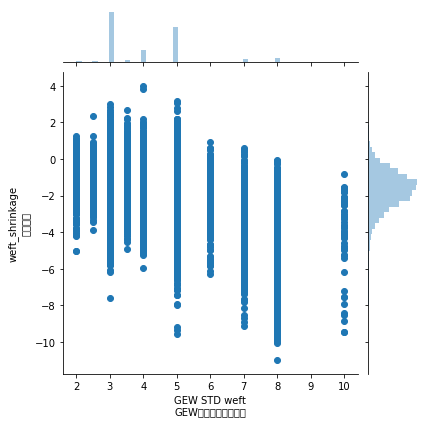

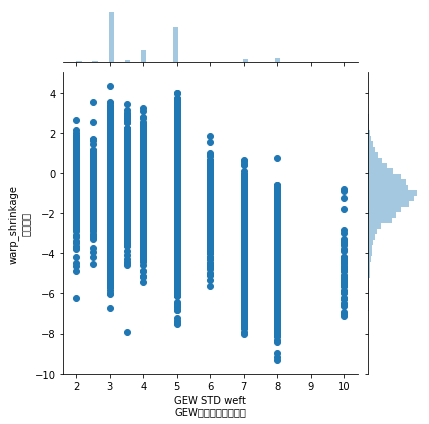

In [118]:
f.add_subplot(2,1,1)
sns.jointplot(x='GEW STD weft\nGEW纬向缩率审单标准',y='weft_shrinkage\n纬向缩率',data=table_3)
print("纬向缩率pearson相关系数：",table_3['weft_shrinkage\n纬向缩率'].corr(table_3['GEW STD weft\nGEW纬向缩率审单标准'],method="pearson"))
print("纬向缩率kendall相关系数：",table_3['weft_shrinkage\n纬向缩率'].corr(table_3['GEW STD weft\nGEW纬向缩率审单标准'],method="kendall"))
print("纬向缩率spearman相关系数：",table_3['weft_shrinkage\n纬向缩率'].corr(table_3['GEW STD weft\nGEW纬向缩率审单标准'],method="spearman"))
f.add_subplot(2,1,2)
sns.jointplot(x='GEW STD weft\nGEW纬向缩率审单标准',y='warp_shrinkage\n经向缩率',data=table_3)
print("经向缩率pearson相关系数：",table_3['warp_shrinkage\n经向缩率'].corr(table_3['GEW STD weft\nGEW纬向缩率审单标准'],method="pearson"))
print("经向缩率kendall相关系数：",table_3['warp_shrinkage\n经向缩率'].corr(table_3['GEW STD weft\nGEW纬向缩率审单标准'],method="kendall"))
print("经向缩率spearman相关系数：",table_3['warp_shrinkage\n经向缩率'].corr(table_3['GEW STD weft\nGEW纬向缩率审单标准'],method="spearman"))
f.clear()


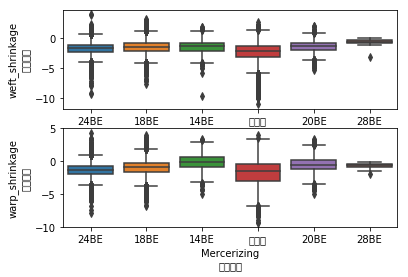

In [126]:
f=plt.figure()
f.add_subplot(2,1,1)
sns.boxplot(x='Mercerizing\n丝光碱浓',y='weft_shrinkage\n纬向缩率',data=table_3)
f.add_subplot(2,1,2)
sns.boxplot(x='Mercerizing\n丝光碱浓',y='warp_shrinkage\n经向缩率',data=table_3)


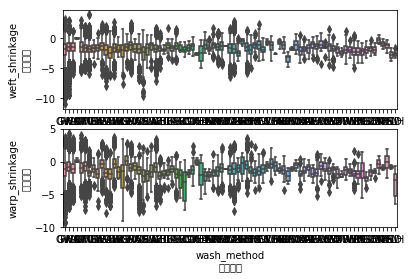

In [127]:
f=plt.figure()
f.add_subplot(2,1,1)
sns.boxplot(x='wash_method\n洗水方法',y='weft_shrinkage\n纬向缩率',data=table_3)
f.add_subplot(2,1,2)
sns.boxplot(x='wash_method\n洗水方法',y='warp_shrinkage\n经向缩率',data=table_3)


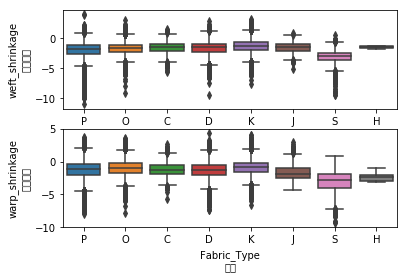

In [125]:
f=plt.figure()
# f.clear()
f.add_subplot(2,1,1)
sns.boxplot(x='Fabric_Type\n织法',y='weft_shrinkage\n纬向缩率',data=table_3)
f.add_subplot(2,1,2)
sns.boxplot(x='Fabric_Type\n织法',y='warp_shrinkage\n经向缩率',data=table_3)


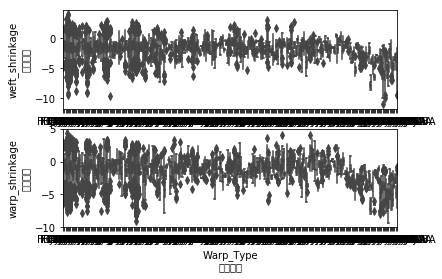

In [128]:
f=plt.figure()
f.add_subplot(2,1,1)
sns.boxplot(x='Warp_Type\n经纱纱型',y='weft_shrinkage\n纬向缩率',data=table_3)
f.add_subplot(2,1,2)
sns.boxplot(x='Warp_Type\n经纱纱型',y='warp_shrinkage\n经向缩率',data=table_3)


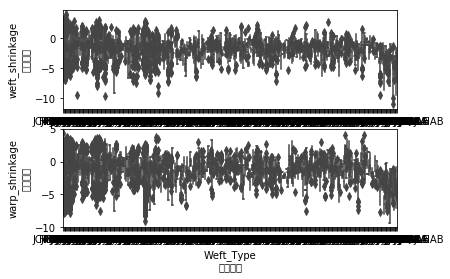

In [129]:
f=plt.figure()
f.add_subplot(2,1,1)
sns.boxplot(x='Weft_Type\n纬纱纱型',y='weft_shrinkage\n纬向缩率',data=table_3)
f.add_subplot(2,1,2)
sns.boxplot(x='Weft_Type\n纬纱纱型',y='warp_shrinkage\n经向缩率',data=table_3)


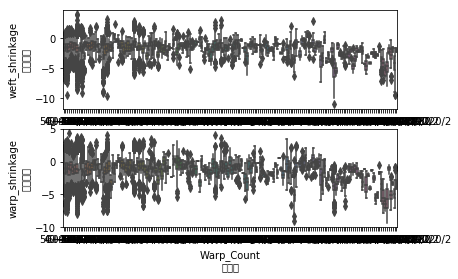

In [130]:
f=plt.figure()
f.add_subplot(2,1,1)
sns.boxplot(x='Warp_Count\n经纱支',y='weft_shrinkage\n纬向缩率',data=table_3)
f.add_subplot(2,1,2)
sns.boxplot(x='Warp_Count\n经纱支',y='warp_shrinkage\n经向缩率',data=table_3)
#可连续化

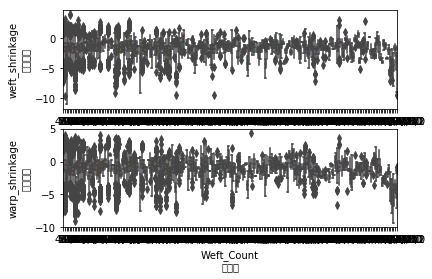

In [132]:
f=plt.figure()
f.add_subplot(2,1,1)
sns.boxplot(x='Weft_Count\n纬纱支',y='weft_shrinkage\n纬向缩率',data=table_3)
f.add_subplot(2,1,2)
sns.boxplot(x='Weft_Count\n纬纱支',y='warp_shrinkage\n经向缩率',data=table_3)
#可连续化

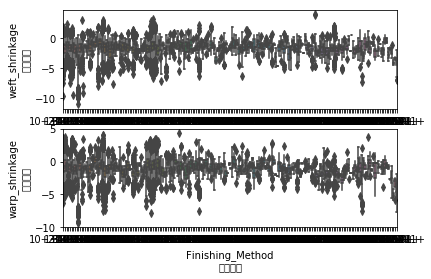

In [133]:
f=plt.figure()
f.add_subplot(2,1,1)
sns.boxplot(x='Finishing_Method\n整理方法',y='weft_shrinkage\n纬向缩率',data=table_3)
f.add_subplot(2,1,2)
sns.boxplot(x='Finishing_Method\n整理方法',y='warp_shrinkage\n经向缩率',data=table_3)
#不好连续化